In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

##### Observações
- Serão feitos testes com número de componentes igual a 2
- Serão feitos testes com número de componentes igual a 3
- Não foi possível fazer testes com número de componentes igual a 20 (mesmo mudando o mtipo de método passado para o TSNE) - muito lento.

### Leitura de dados

In [2]:
df = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [3]:
df_scaled = df.drop(['no_curso','co_curso'],axis=1)

### Definição métodos TSNE

In [4]:
barnes_hut = 'barnes_hut'
exact = 'exact'

### Funções

In [5]:
random_state = 42

In [6]:
def plotar_grafico_perplexity(n_components, method):
    #Escolhendo perplexity
    perplexity = np.arange(5, 55, 5)
    divergence = []
    
    for i in perplexity:
        model = TSNE(n_components=n_components, init="pca", perplexity=i, method=method, random_state=random_state)
        reduced = model.fit_transform(df_scaled)
        divergence.append(model.kl_divergence_)
    
    # Criar o gráfico com matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(perplexity, divergence, marker='o', color='red', linewidth=1, label='Divergence')
    plt.title("Divergence vs Perplexity", fontsize=16)
    plt.xlabel("Perplexity Values", fontsize=14)
    plt.ylabel("Divergence", fontsize=14)
    plt.grid(alpha=0.5)
    plt.legend(fontsize=12)
    plt.show()

In [7]:
def reduzir_dimensionalidade_t_sne(n_components, perplexity, method):
    #Reduzir dimensionalidade com t-SNE
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state, method=method)
    data_tsne = tsne.fit_transform(df_scaled)

    return data_tsne

In [8]:
def aplicar_k_means(data, n_clusters):
    #Aplicar K-Means no espaço reduzido
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)

    return kmeans

In [9]:
def visualizar_silhueta_k_means(kmeans, data):
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.show()

In [10]:
def visualizar_clusters(kmeans, data, n_clusters):
    #Visualizar os clusters
    clusters = kmeans.predict(data)
    
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(data[clusters == i, 0], data[clusters == i, 1], label=f'Cluster {i}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', label='Centroides')
    plt.title('Clusters com t-SNE + K-Means')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

In [11]:
def plotar_grafico_wccs(data):
    sum_of_squares = []
    for k in range(1, 21):
        kmeans_tsne = aplicar_k_means(data, k)
        sum_of_squares.append(kmeans_tsne.inertia_)

    plt.figure(figsize = (10, 8))
    plt.plot(range(1, 21), sum_of_squares, marker = 'o', linestyle = '--')
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    plt.title("K-means with t-SNE clustering")

In [12]:
def plotar_resultados_k_means(k_inicial, k_final, data):
    for i in range (k_inicial, k_final + 1):
        kmeans = aplicar_k_means(data, i)
        visualizar_silhueta_k_means(kmeans, data)
        visualizar_clusters(kmeans, data, i)

### n_componentes = 2

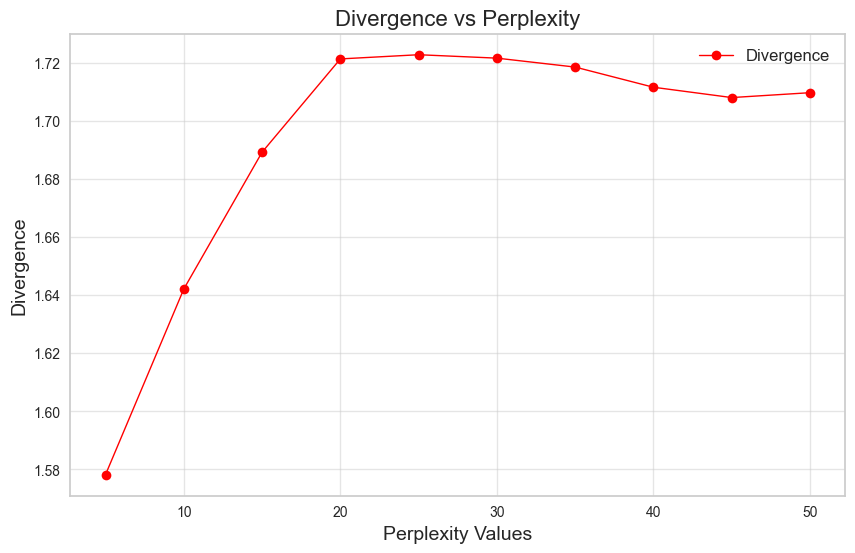

In [13]:
plotar_grafico_perplexity(2, barnes_hut)

In [14]:
data_n_2 = reduzir_dimensionalidade_t_sne(2, 40, barnes_hut)

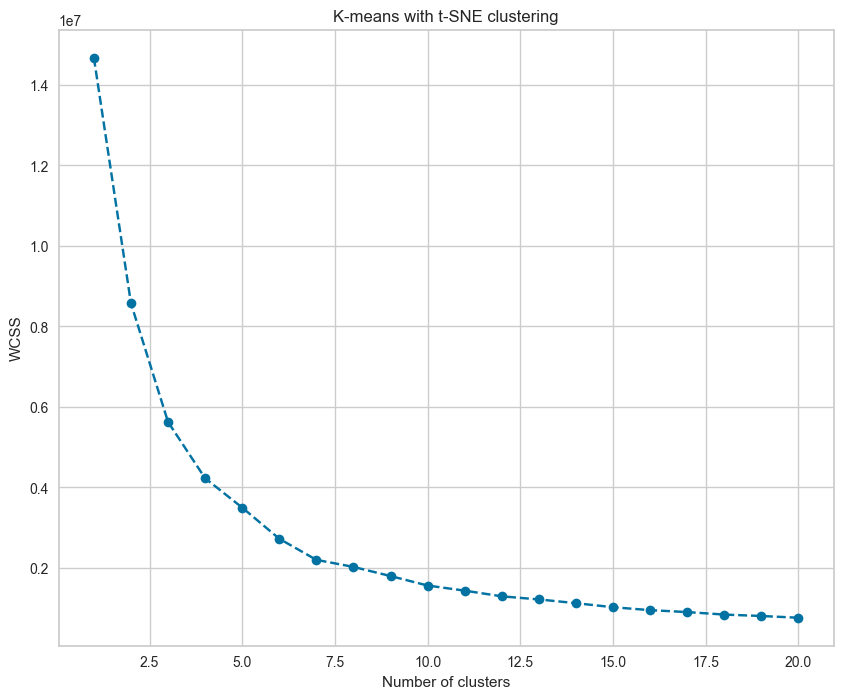

In [15]:
plotar_grafico_wccs(data_n_2)

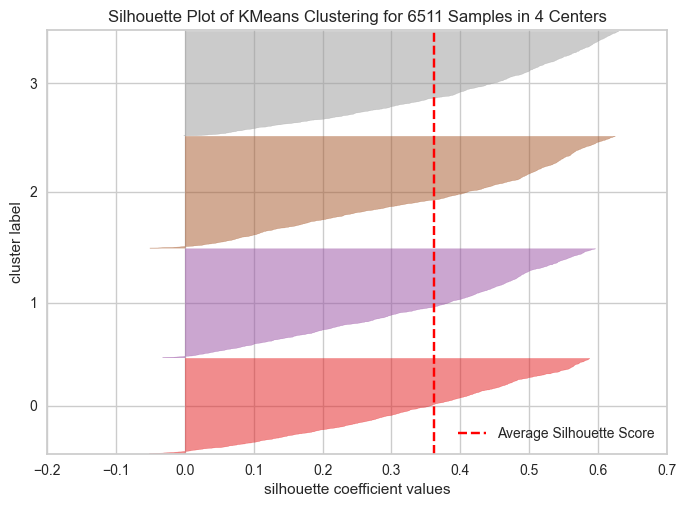

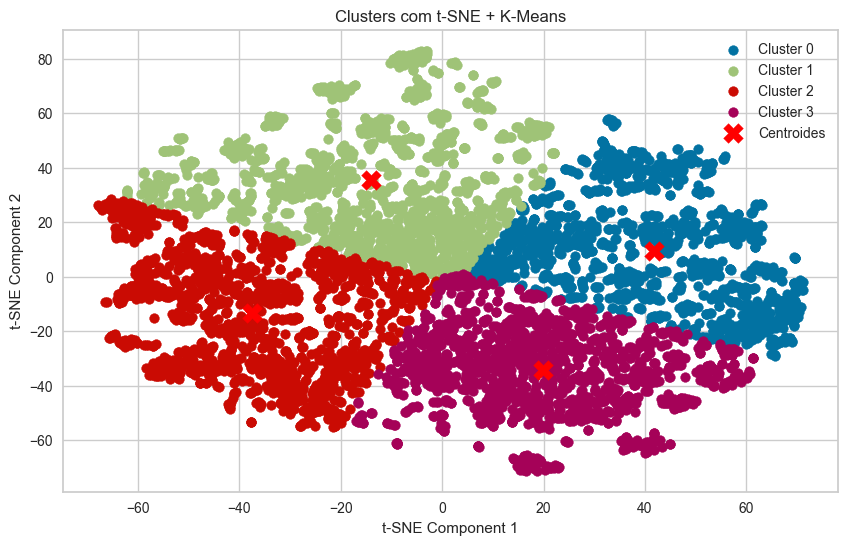

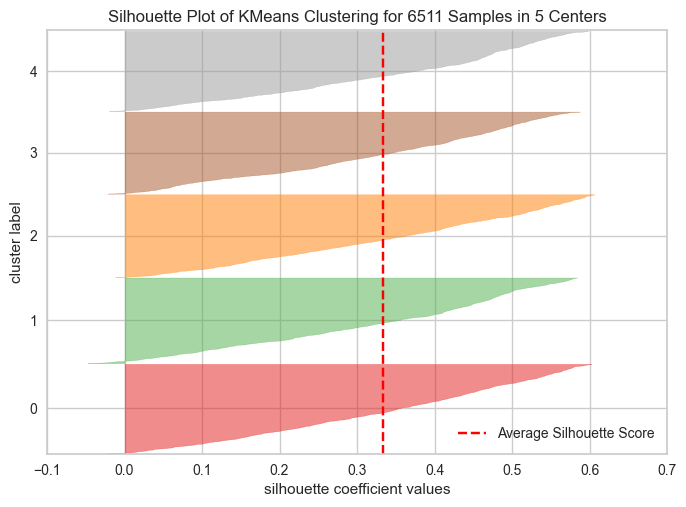

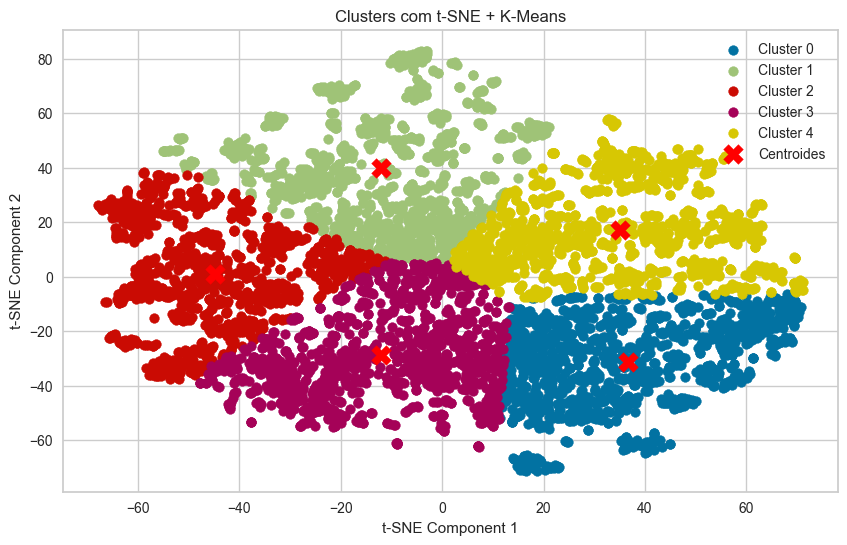

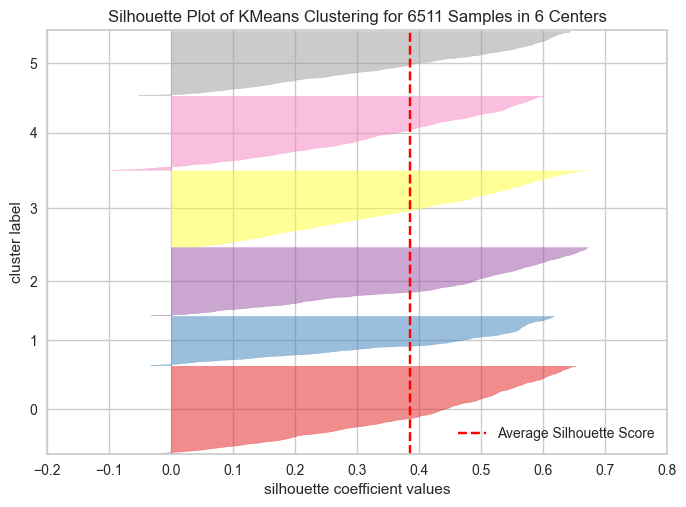

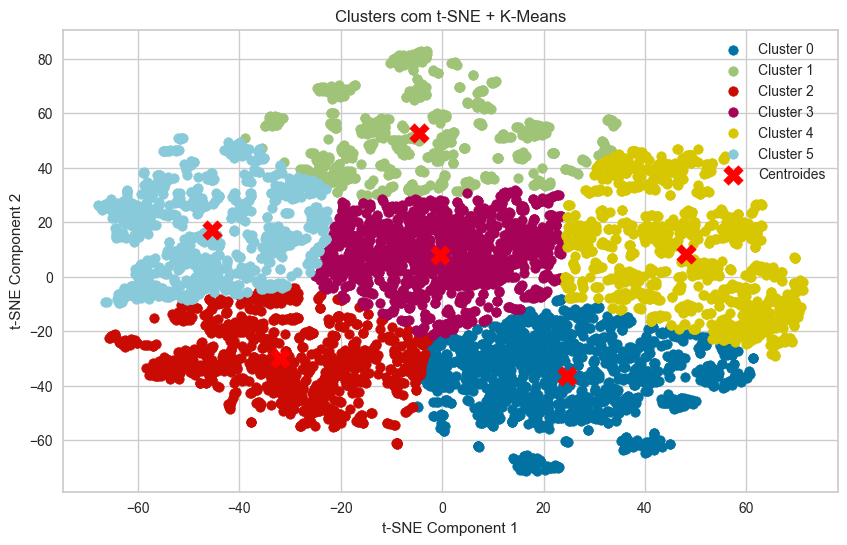

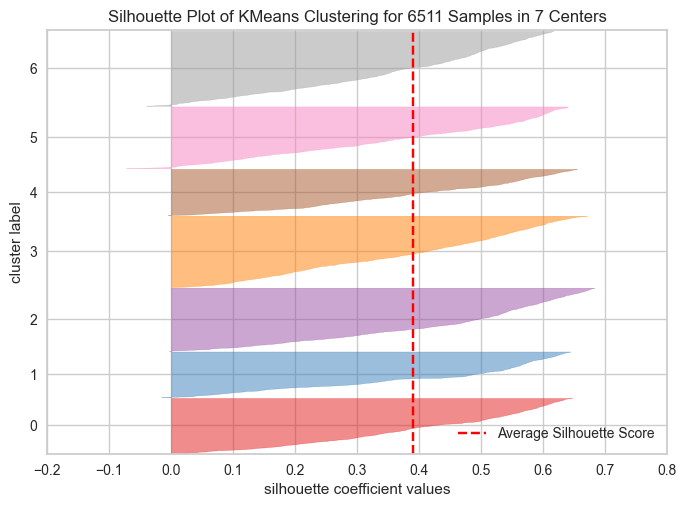

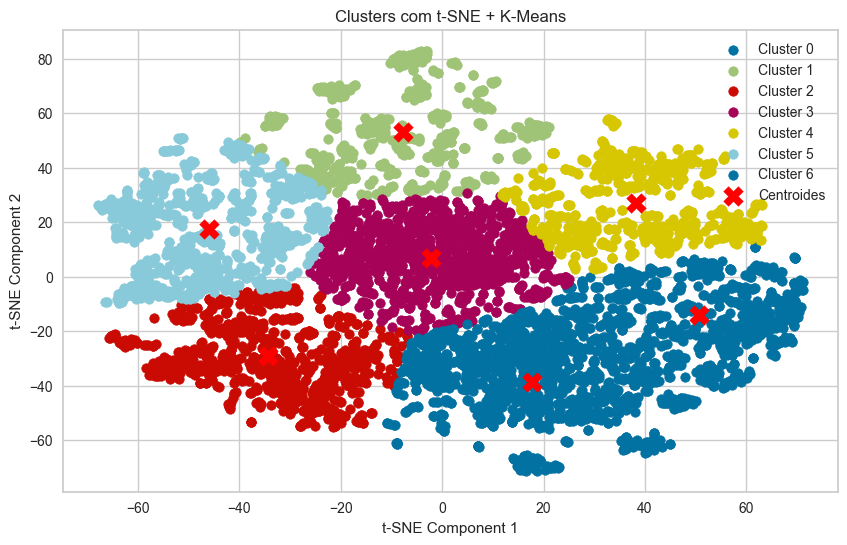

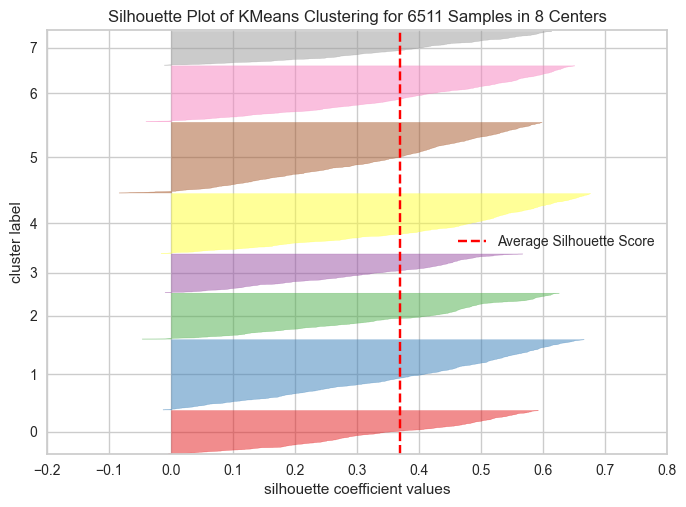

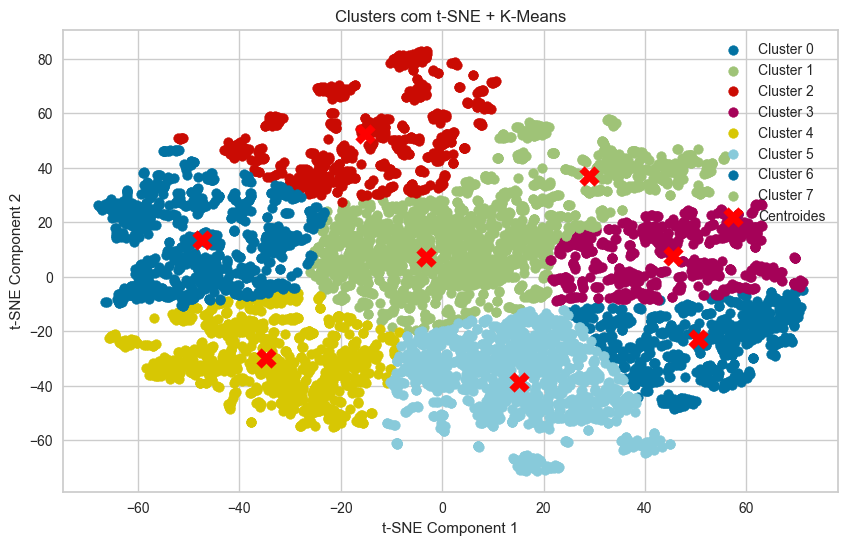

In [16]:
#De acordo com o gráfico anterior, plotar silhueta com K's de 4 a 8
plotar_resultados_k_means(4, 8, data_n_2)

### n_componentes = 3

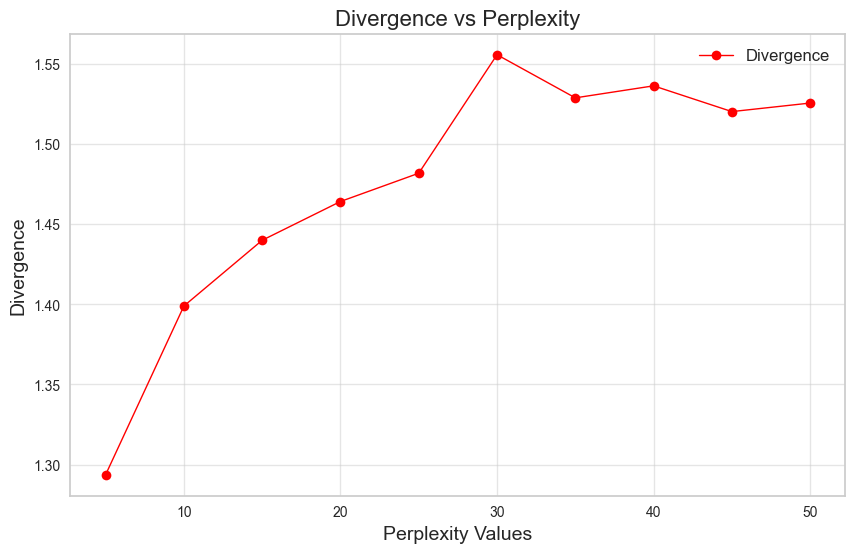

In [17]:
plotar_grafico_perplexity(3, barnes_hut)

In [18]:
data_n_3 = reduzir_dimensionalidade_t_sne(3, 40, barnes_hut)

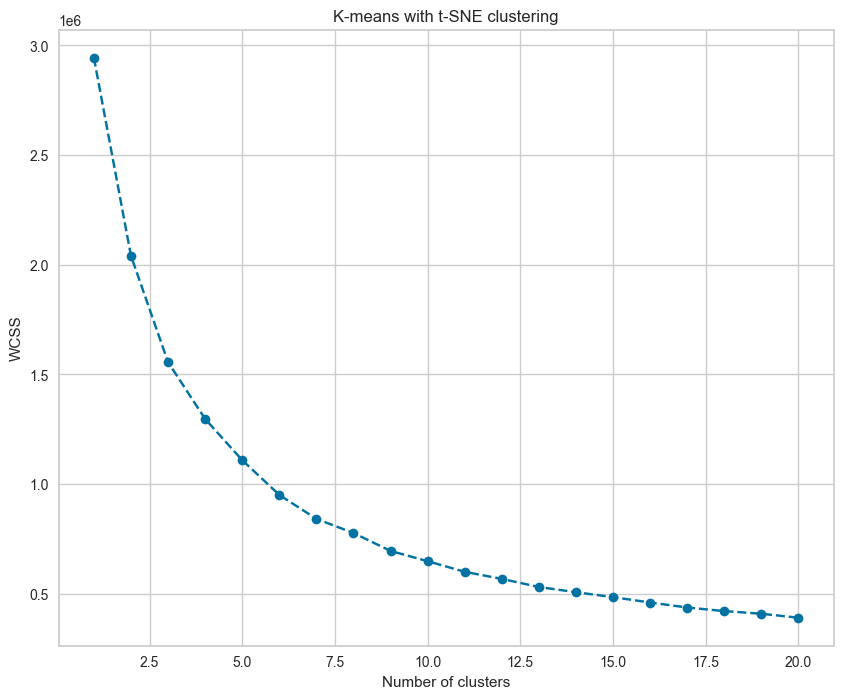

In [19]:
plotar_grafico_wccs(data_n_3)

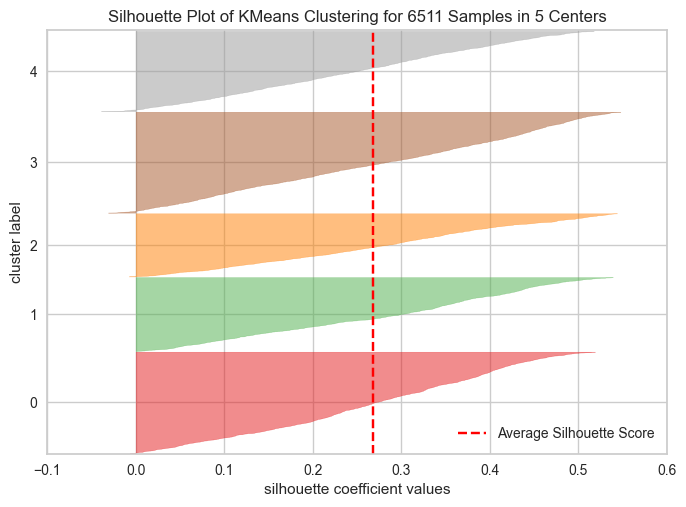

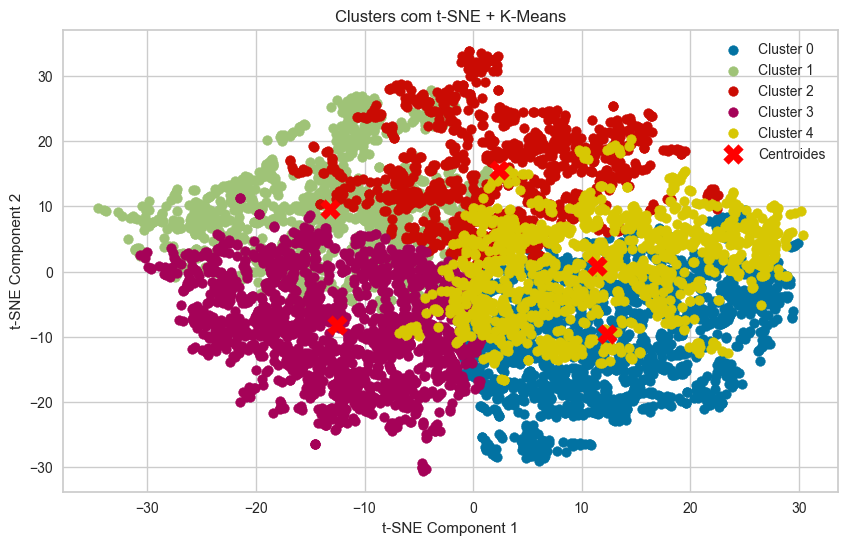

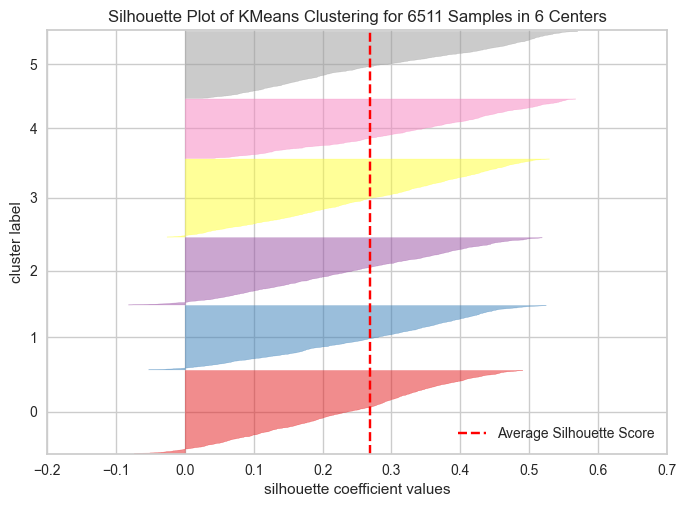

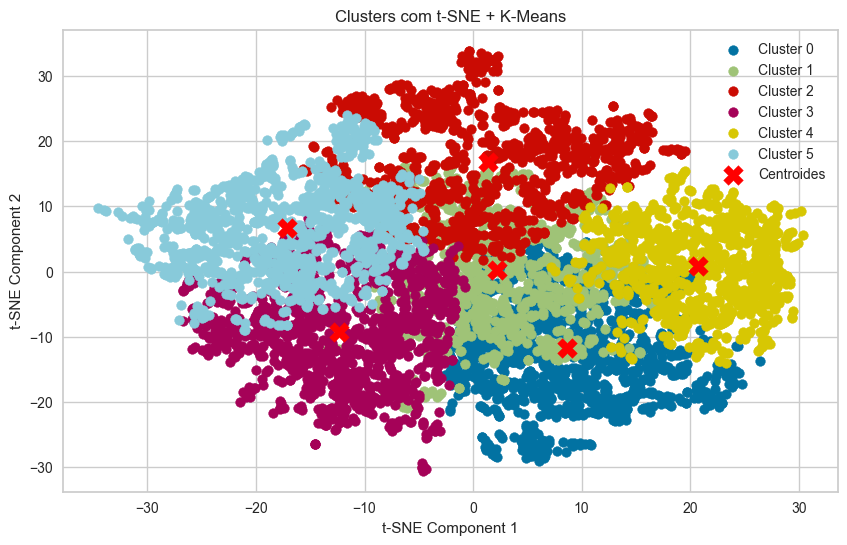

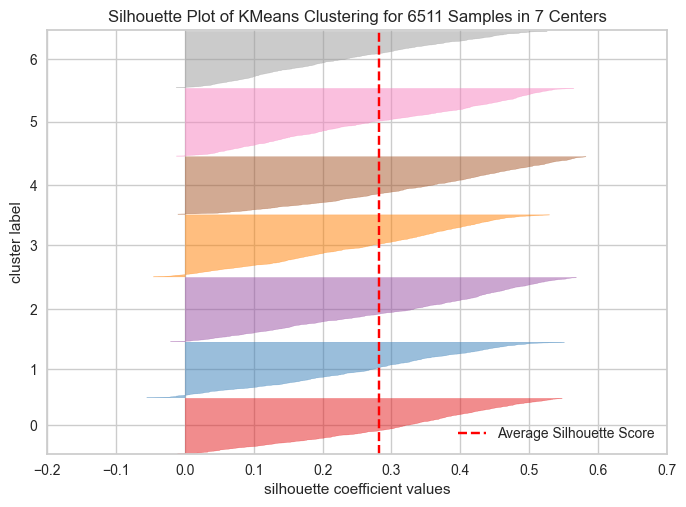

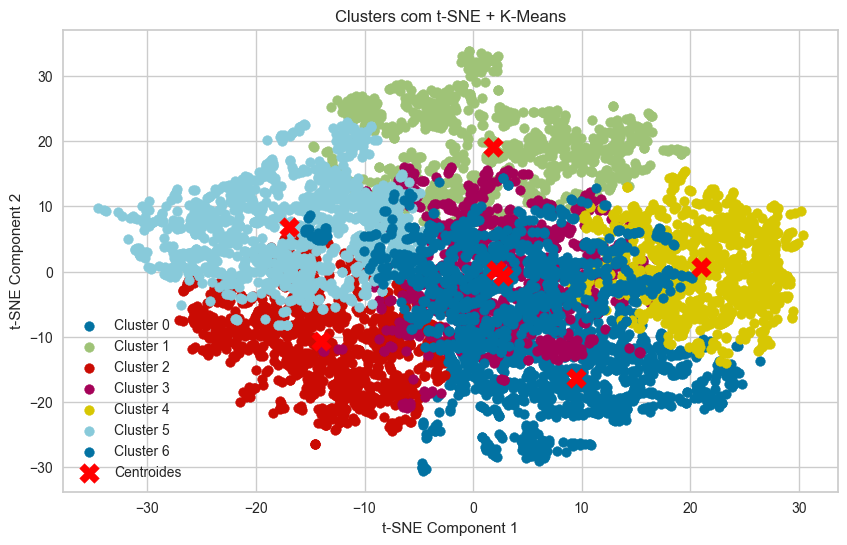

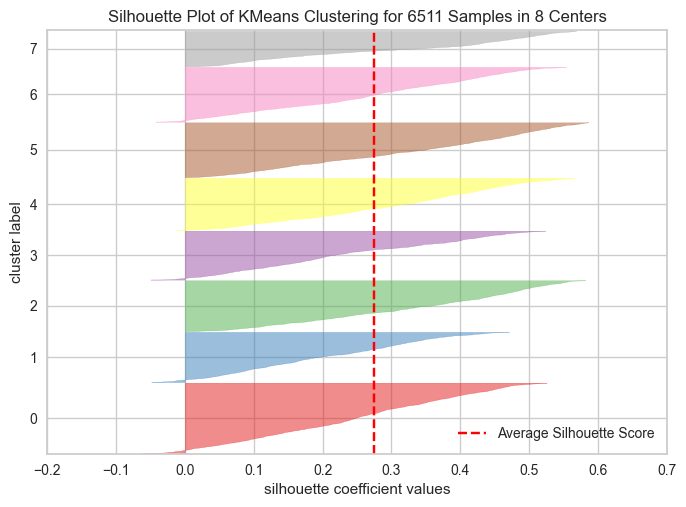

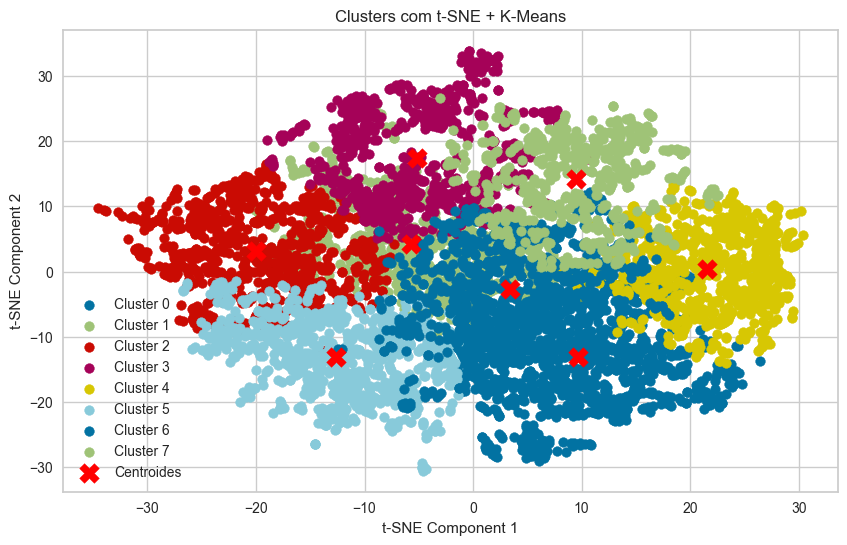

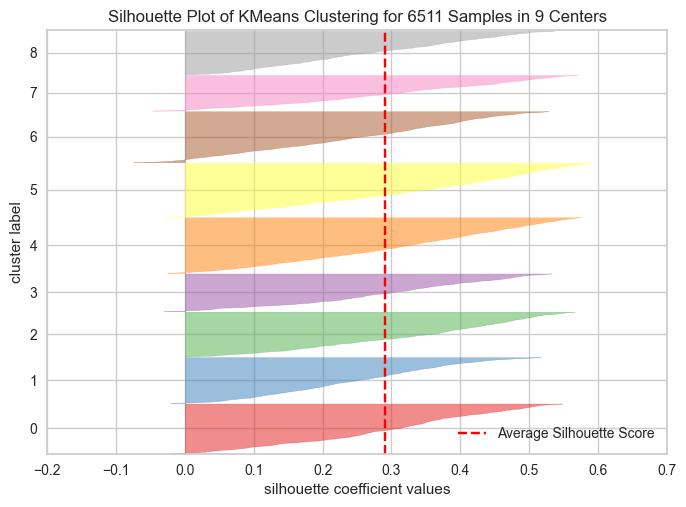

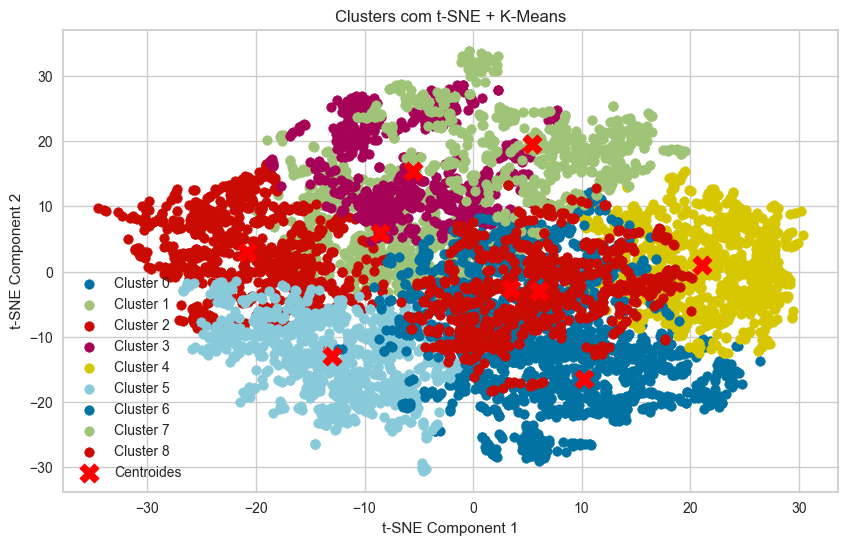

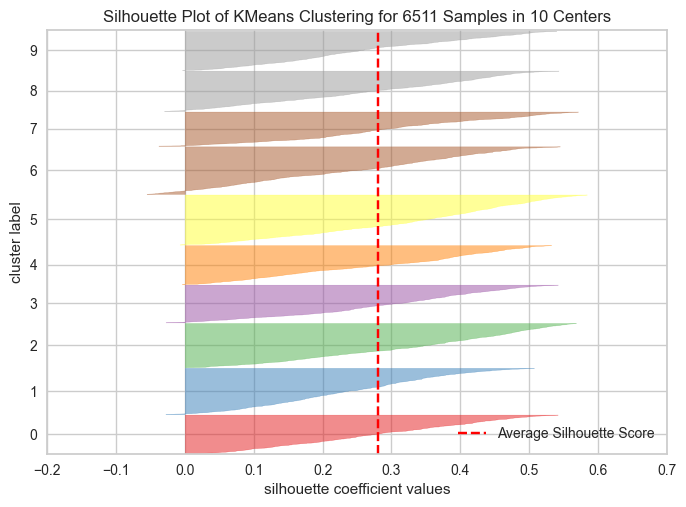

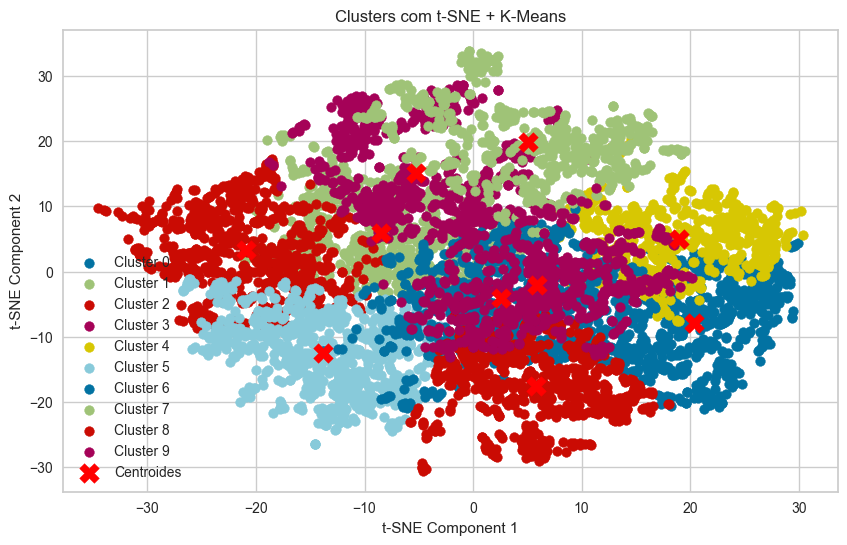

In [20]:
#De acordo com o gráfico anterior, plotar silhueta com K's de 5 a 10
plotar_resultados_k_means(5, 10, data_n_3)